In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


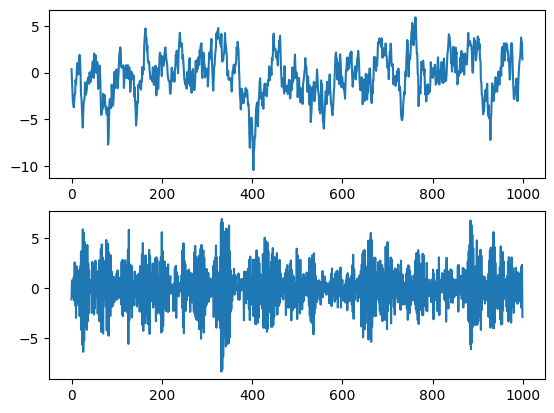

"\nThe two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.\n"

In [3]:
# exercise 01

"""
Simulate AR(1) Time Series

You will simulate and plot a few AR(1) time series, each with a different parameter,'phi', using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive and a large negative 'phi', but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with 'phi'=0.9, the array representing the AR parameters would be ar = np.array([1, -0.9])
"""

# Instructions

"""
Import the class ArmaProcess in the arima_process module.
Plot the simulated AR processes:

    Let ar1 represent an array of the AR parameters [1, -'phi'] as explained above. For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.
    With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
    Simulate 1000 data points from the object you just created, AR_object1, using the method .generate_sample(). Plot the simulated data in a subplot.

Repeat for the other AR parameter.
"""

# solution

# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

#----------------------------------#

# Conclusion

"""
The two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.
"""

In [4]:
simulated_data_3 = ArmaProcess(np.array([1,-0.3]), np.array([1])).generate_sample(nsample=1000)

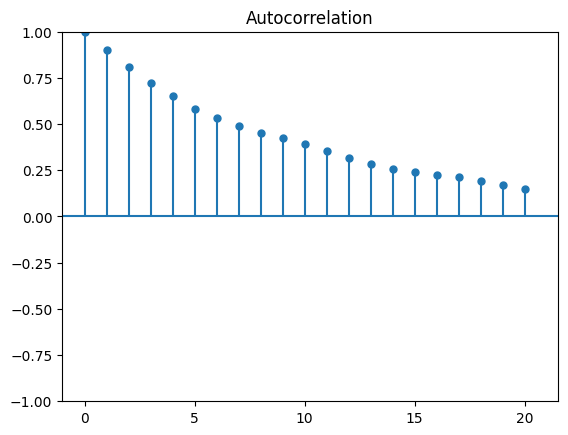

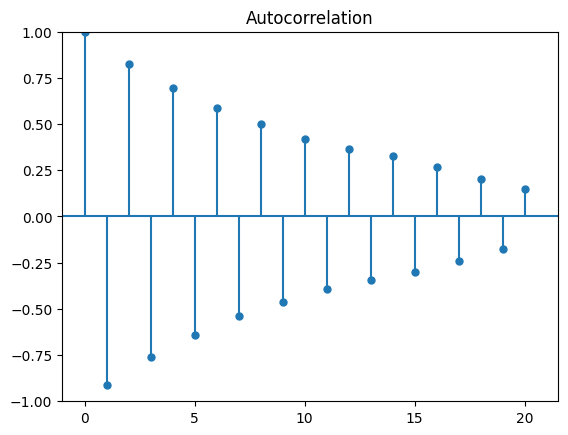

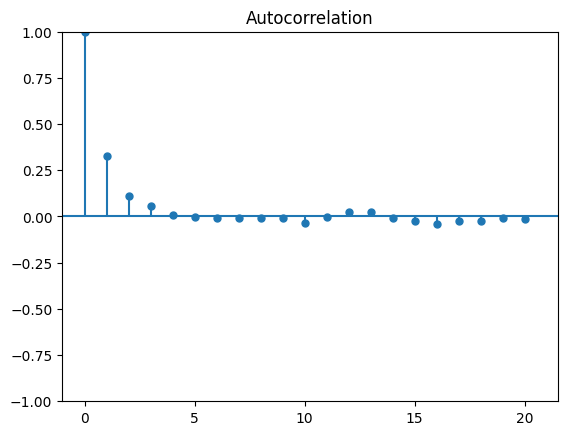

'\nWell Done! The ACF plots match what we predicted.\n'

In [5]:
# exercise 02

"""
Compare the ACF for Several AR Time Series

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, 'phi'=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)² = 0.81, the third-lag will be (0.9)³ = 0.729,etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be
-(0.9)² = 0.81, the third-lag will be -(0.9)³ = -0.729, etc.

The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3
"""

# Instructions

"""
Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and suppress the confidence intervals by setting alpha=1).
"""

# solution

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

#----------------------------------#

# Conclusion

"""
Well Done! The ACF plots match what we predicted.
"""

# Match AR Model with ACF

Here are four Autocorrelation plots:

![image](/home/nero/Documents/Estudos/DataCamp/Python/courses/time-series-analysis-in-python/MultChoice_Ch3.png)

Which figure corresponds to an AR(1) model with an AR parameter of -0.5?

### Possible Answers


    A
    
    
    B
    
    
    C
    
    
    D {Answer}

In [6]:
# exercise 03

"""
Estimating an AR Model

You will estimate the AR(1) parameter,'phi', of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true 'phi' of 0.9, you will print out the estimate of 'phi'. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.
"""

# Instructions

"""
Import the class ARIMA in the module statsmodels.tsa.arima.model.
Create an instance of the ARIMA class called mod using the simulated data simulated_data_1 and the order (p,d,q) of the model (in this case, for an AR(1)), is order=(1,0,0).
Fit the model mod using the method .fit() and save it in a results object called res.
Print out the entire summary of results using the .summary() method.
Just print out an estimate of
using the .params[1] attribute (no parentheses).
"""

# solution

# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

#----------------------------------#

# Conclusion

"""
Notice how close the estimated parameter is to the true parameter.
"""

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1427.156
Date:                Wed, 13 Mar 2024   AIC                           2860.313
Time:                        08:45:39   BIC                           2875.036
Sample:                             0   HQIC                          2865.909
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2829      0.329     -0.860      0.390      -0.927       0.362
ar.L1          0.9017      0.013     67.535      0.000       0.876       0.928
sigma2         1.0149      0.044     22.854      0.0

'\nNotice how close the estimated parameter is to the true parameter.\n'

In [8]:
import pandas as pd
simulated_data_1 = pd.DataFrame(simulated_data_1, columns=['data'])

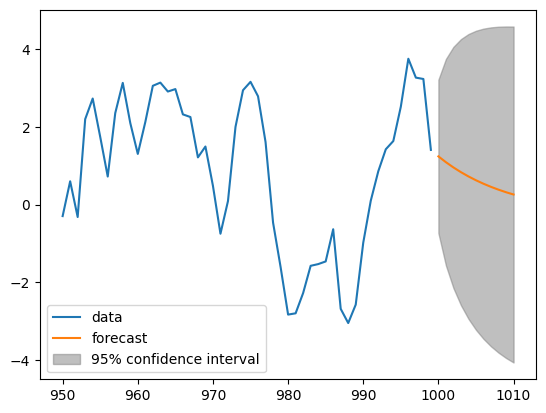

'\nNotice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. Try it out and see for yourself!\n'

In [9]:
# exercise 04

"""
Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. You can plot the forecasted data using the function plot_predict(). You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated data in DataFrame simulated_data_1, with 'phi'=0.9, you will plot out-of-sample forecasts and confidence intervals around those forecasts.
"""

# Instructions

"""

    Import the class ARIMA and also import the function plot_predict
    Create an instance of the ARIMA class called mod using the simulated data in DataFrame simulated_data_1 and the order (p,d,q) of the model (in this case, for an AR(1)), order=(1,0,0)
    Fit the model mod using the method .fit() and save it in a results object called res
    Plot the in-sample data starting with data point 950
    Plot out-of-sample forecasts of the data and confidence intervals using the plot_predict() function, starting where the data ends at the 1000th point, and ending the forecast at point 1010

"""

# solution

# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

#----------------------------------#

# Conclusion

"""
Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. Try it out and see for yourself!
"""

In [12]:
interest_rate_data = pd.read_csv(path_data+'daily_rates.csv', parse_dates=['DATE'], index_col='DATE').resample(rule='YE').last()
interest_rate_data.head()

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


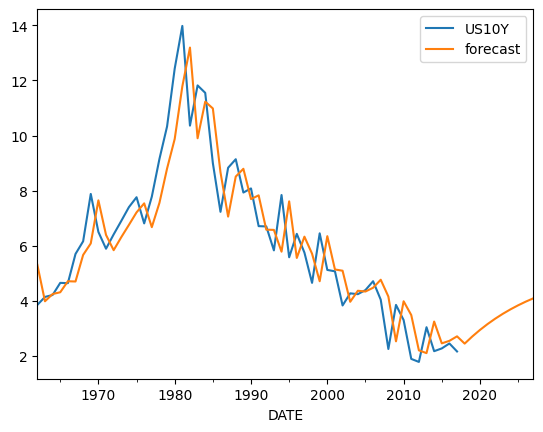

'\nAccording to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.\n'

In [15]:
# exercise 05

"""
Let's Forecast Interest Rates

You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

The class ARIMA and the function plot_predict have already been imported.
"""

# Instructions

"""

    Create an instance of the ARIMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.
    Fit the model mod using the method .fit() and save it in a results object called res.
    Plot the data and the in-sample and out-of-sample forecasts of the data using the .plot_predict() function.
        The first argument of plot_predict() should be the fitted model.
        Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2027' to forecast several years in the future.
        Note that the end argument 2027 must be in quotes here since it represents a date and not an integer position.

"""

# solution

# Forecast interst rates using an AR(1) model
mod = ARIMA(interest_rate_data, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
interest_rate_data.plot(ax=ax)
plot_predict(res, start=0, end='2027', alpha=None, ax=ax)
plt.show()

#----------------------------------#

# Conclusion

"""
According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.
"""

In [17]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

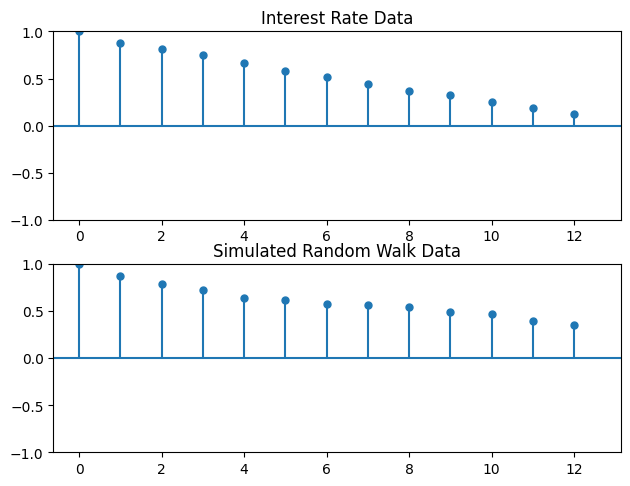

'\nNotice the Autocorrelation functions look very similar for the two series.\n'

In [19]:
# exercise 06

"""
Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.
"""

# Instructions

"""


    Import plot_acf function from the statsmodels module

    Create two axes for the two subplots

    Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot

    Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

"""

# solution

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

#----------------------------------#

# Conclusion

"""
Notice the Autocorrelation functions look very similar for the two series.
"""

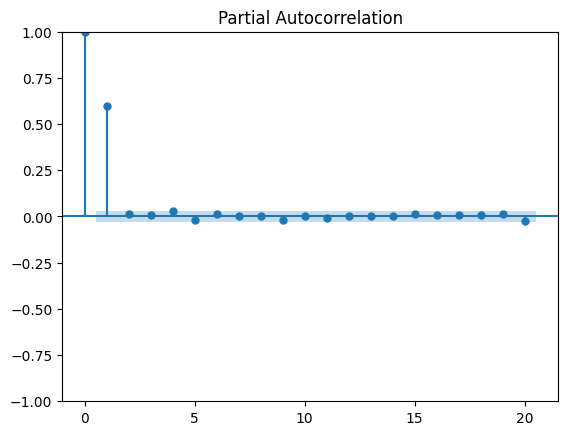

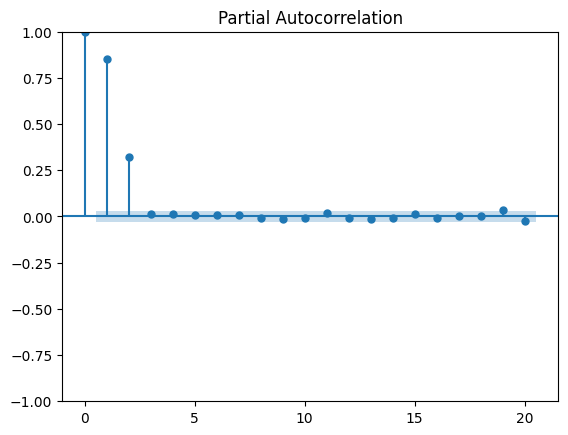

'\nNotice that the number of significant lags for the PACF indicate the order of the AR model.\n'

In [20]:
# exercise 07

"""
Estimate Order of Model: PACF

One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.
"""

# Instructions

"""

Import the modules for simulating data and for plotting the PACF

Simulate an AR(1) with 'phi'=0.6(remember that the sign for the AR parameter is reversed)

Plot the PACF for simulated_data_1 using the plot_pacf function

Simulate an AR(2) with 'phi'=0.6, 'phi'2=0.3(again, reverse the signs)

Plot the PACF for simulated_data_2 using the plot_pacf function
"""

# solution

# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

#----------------------------------#

# Conclusion

"""
Notice that the number of significant lags for the PACF indicate the order of the AR model.
"""

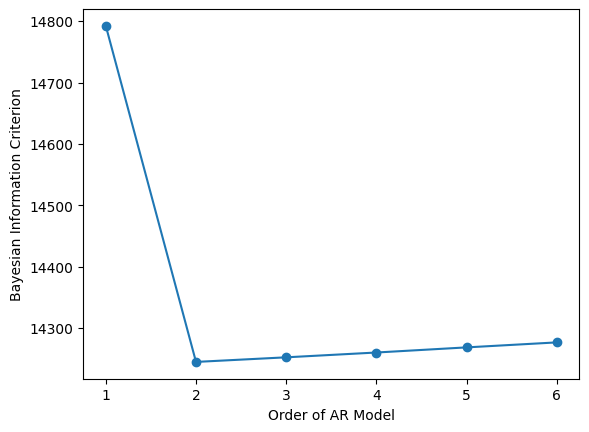

'\nFor an AR(2), the BIC achieves its minimum at p=2, which is what we expect.\n'

In [21]:
# exercise 08

"""
Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.
"""

# Instructions

"""

    Import the ARIMA module for estimating the parameters and computing BIC.
    Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.
    Loop through order p for p = 0,…,6.
        For each p, fit the data to an AR model of order p.
        For each p, save the value of BIC using the .bic attribute (no parentheses) of res.
    Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,…6).

"""

# solution

# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

#----------------------------------#

# Conclusion

"""
For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.
"""